Este colab fue desarrollado por Arnold Charry Armero.

# Centro de Gravedad

El Método Centro de Gravedad es una técnica matemática que permite localizar la ubicación de un centro de distribución que minimice los costos de distribución (Heizer & Render, 2004). Este método toma en cuenta la ubicación de los mercados, el volumen de los productos que se embarcan hacia esos mercados y los costos de embarque de tal forma que se pueda encontrar la mejor ubicación para el centro de distribución. El Método Centro de Gravedad supone que el costo es directamente proporcional tanto a la distancia como al volumen enviado. La localización ideal es aquella que minimiza la distancia ponderada entre el almacén y sus tiendas al menudeo (Heizer & Render, 2004). Existen dos enfoques, uno por demanda y el otro por costos.



## Enfoque por Demanda

El enfoque por demanda se centra únicamente en las unidades demandadas por las tiendas al menudeo sin centrarse en los costos. Matemáticamente se define de la siguiente manera:

$$ x_{0} = \frac{\sum_{i = 1}^{N} x_{i} D_{i}}{\sum_{i = 1}^{N} D_{i}} $$


$$ y_{0} = \frac{\sum_{i = 1}^{N} y_{i} D_{i}}{\sum_{i = 1}^{N} D_{i}} $$

donde,

$ x_{i} = \mathrm{Coordenada \:}x \mathrm{\: de \: la \: posicion \:}i$

$ y_{i} = \mathrm{Coordenada \:}y \mathrm{\: de \: la \: posicion \:}i$

$ D_{i} = \mathrm{Cantidad \:} D \mathrm{\: de \: bienes \: demandados \: desde \: o \: hacia \: la \: localizacion \:}i$

$ N = \mathrm{Cantidad \:} N \mathrm{\: de \: coordenadas}$


In [ ]:
#Se importan las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

In [ ]:
#Conectamos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Se ingresan los datos
df = pd.read_excel("/content/drive/MyDrive/Operations II/Datos Localización con Enfoque de Demanda.xlsx")
df.head(5)

,Ubicación,X,Y,Pedidos
0,Norte,4,17,3400
1,Chapinero,6,14,14200
2,Centro,7,10,12100
3,Zona Industrial,4,7,18100
4,Sur,2,3,24500


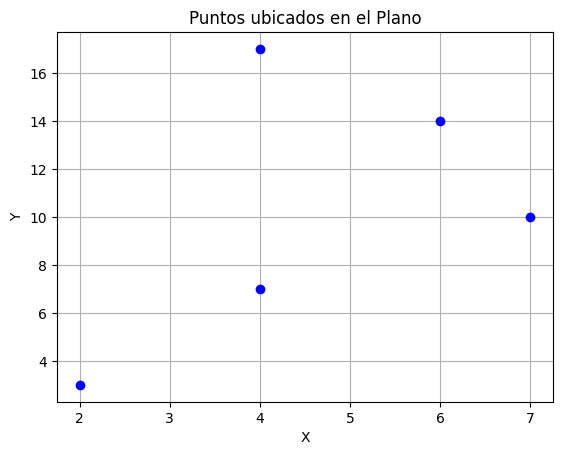

In [ ]:
#Se grafican los puntos
plt.grid()
plt.title("Puntos ubicados en el Plano")
plt.plot(df.iloc[:, 1], df.iloc[:, 2], 'o', color = "blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
#Se crea la función para hallar el x óptimo
def x_optimal_demand(X, D):
  """
  Función que calcula el x óptimo para un enfoque
  de demanda con el Método Centro de Gravedad

  Args:
    X: lista de datos que contiene los componentes
    en x de cada coordenada
    D: lista de datos que contienen los pedidos
    en D de cada coordenada

  Returns:
    x_optimal: valor x óptimo para la localización
  """

  n = len(X)
  sum1 = 0
  sum2 = 0
  for i in range(n):
    sum1 += X[i] * D[i]
    sum2 += D[i]

  x_optimal = sum1 / sum2

  return x_optimal

In [ ]:
#Se halla el x óptimo
x = x_optimal_demand(df.iloc[:, 1], df.iloc[:, 3])
print(x)

4.217150760719226


In [ ]:
#Se crea la función para hallar el x óptimo
def y_optimal_demand(Y, D):
  """
  Función que calcula el y óptimo para un enfoque
  de demanda con el Método Centro de Gravedad

  Args:
    Y: lista de datos que contiene los componentes
    en y de cada coordenada
    D: lista de datos que contienen los pedidos
    en D de cada coordenada

  Returns:
    y_optimal: valor y óptimo para la localización
  """

  n = len(Y)
  sum1 = 0
  sum2 = 0
  for i in range(n):
    sum1 += Y[i] * D[i]
    sum2 += D[i]

  y_optimal = sum1 / sum2

  return y_optimal

In [ ]:
#Se halla el y óptimo
y = y_optimal_demand(df.iloc[:, 2], df.iloc[:, 3])
print(y)

7.991701244813278


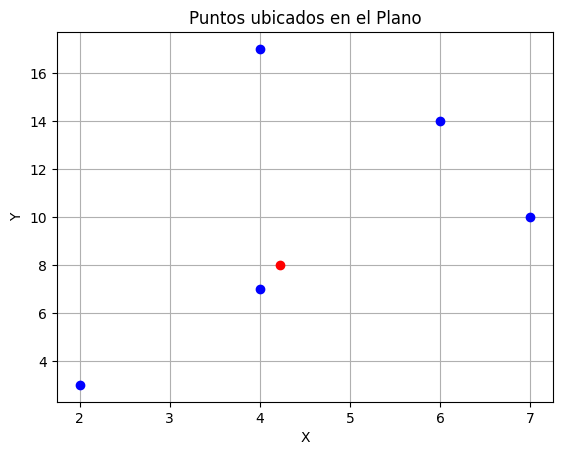

In [ ]:
#Se realiza el gráfico de los puntos
plt.plot(x, y,'o', color = "red")
plt.grid()
plt.title("Puntos ubicados en el Plano")
plt.plot(df.iloc[:, 1], df.iloc[:, 2], 'o', color = "blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

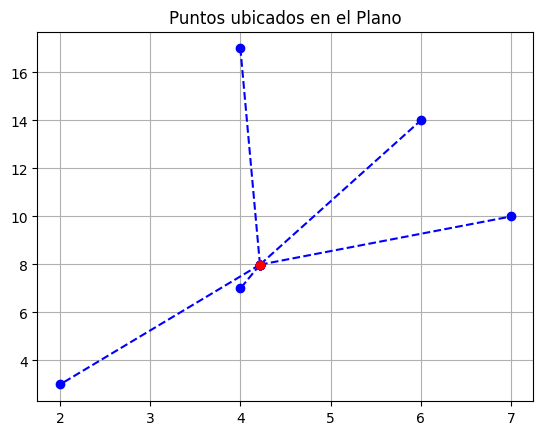

In [ ]:
#Se unen las líneas de los puntos
import matplotlib.pyplot as plt
for i in range(df.shape[0]):
  point1 = [x, y]
  point2 = [df.iloc[i, 1], df.iloc[i, 2]]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  plt.plot(x_values, y_values, 'bo', linestyle="dashed")
  plt.plot(x, y,'o', color = "red")
plt.grid()
plt.title("Puntos ubicados en el Plano")
plt.show()

## Enfoque por Costo

El enfoque por costo se concentra en tener los costos controlados de tal forma que la ubicación óptima los mantiene al mínimo. En primer lugar, se debe cuántificar la distancia entre el punto inicial $x_{0}$  y $y_{0}$ y las coordenadas de los puntos de venta al menudeo. Matemáticamente se expresa de la siguiente manera:

$$ x_{0} = \frac{\sum_{i = 1}^{N} V_{i} \: CT_{i} \: x_{i}}{\sum_{i = 1}^{N} V_{i} \: CT_{i}} $$

$$y_{0} = \frac{\sum_{i = 1}^{N} V_{i} \: CT_{i} \: y_{i}}{\sum_{i = 1}^{N} V_{i} \: CT_{i}} $$

$ x_{i} = \mathrm{Coordenada \:}x \mathrm{\: de \: la \: posicion \:}i$

$ y_{i} = \mathrm{Coordenada \:}y \mathrm{\: de \: la \: posicion \:}i$

$ V_{i} = \mathrm{Volumen \:} V \mathrm{\: de \: bienes \: demandados \: desde \: o \: hacia \: la \: localizacion \:}i$

$ CT_{i} = \mathrm{Costo \: de \: transporte \:} CT \mathrm{\:desde \: o \: hacia \: la \: localizacion \:}i$

$ N = \mathrm{Cantidad \:} N \mathrm{\: de \: coordenadas}$

Ahora bien, la función objetivo a minimizar viene siendo la de costo. La cual, por su naturaleza matemática, viene siendo un problema de optimización no lineal. Se expresa de la siguiente manera:



$$ C_{T} (x, y) = \sum_{i = 1}^{N} V_{i} \: CT_{i} \: \sqrt{(x - x_{i})^{2} + (y - y_{i})^{2} } $$

Definiendo, por cuestiones de notación, a $d_{i}$ como:

$$ d_{i} = \sqrt{(x - x_{i})^{2} + (y - y_{i})^{2} } $$

Y, por medio de las derivadas parciales con respecto a $x$ y $y$, se hallan sus valores óptimos.

$$ \frac{\partial C_{T}}{\partial x} = 0, \frac{\partial C_{T}}{\partial y} = 0 $$

Dando como resultado,

$$ x^{*} = \frac{\frac{\sum_{i = 1}^{N} V_{i} \: CT_{i} \: x_{i}}{d_{i}}}{\frac{\sum_{i = 1}^{N} V_{i} \: CT_{i}}{d_{i}}}$$

$$ y^{*} = \frac{\frac{\sum_{i = 1}^{N} V_{i} \: CT_{i} \: y_{i}}{d_{i}}}{\frac{\sum_{i = 1}^{N} V_{i} \: CT_{i}}{d_{i}}}$$

In [ ]:
#Se ingresan los datos
df = pd.read_excel("/content/drive/MyDrive/Operations II/Datos Centro de Gravedad - Enfoque Costo.xlsx")
df.head(10)

,Ciudad,Tipo de instalación,Volumen,X,Y,Costo transporte
0,Cali,Proveedor,12000,123.3,88.9,170
1,Tuluá,Proveedor,5000,163.2,159.6,200
2,Cali,Punto de venta,5500,123.3,88.9,215
3,Buga,Punto de venta,4000,151.4,139.6,300
4,Cartago,Punto de venta,1000,196.7,235.7,270
5,Palmira,Punto de venta,3500,152.3,98.0,255
6,Buenaventura,Punto de venta,2000,61.9,138.3,320
7,Zarzal,Punto de venta,1000,179.5,196.7,285


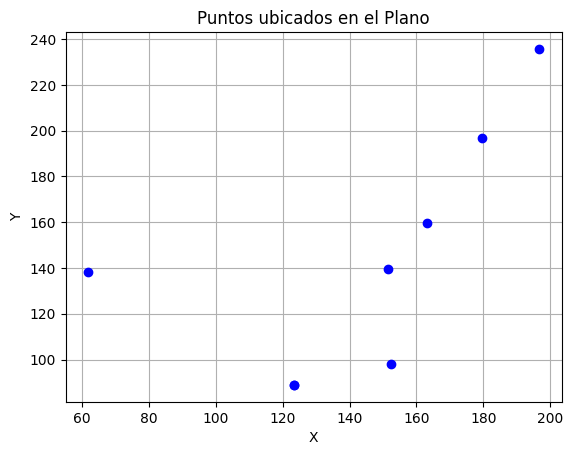

In [ ]:
#Se grafican los puntos
plt.grid()
plt.title("Puntos ubicados en el Plano")
plt.plot(df.iloc[:, 3], df.iloc[:, 4], 'o', color = "blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Se debe obtener la coordenada inicial para $x$ y para $y$,

In [ ]:
#Se crea la función para hallar el x inicial
def x_initial_cost(X, V, CT):
  """
  Función que calcula el x óptimo para un enfoque
  de demanda con el Método Centro de Gravedad

  Args:
    X: lista de datos que contiene los componentes
    en x de cada coordenada
    V: lista de datos que contienen el volumen
    para la coordenada i
    CT: lista de datos que contienen el Costo de
    transporte para la coordenada i

  Returns:
    x_initial: valor x inicial para la localización
  """

  n = len(X)
  sum1 = 0
  sum2 = 0
  for i in range(n):
    sum1 += V[i] * CT [i] * X[i]
    sum2 += V[i] * CT [i]

  x_initial = sum1 / sum2

  return x_initial

In [ ]:
#Se halla el x inicial
x = x_initial_cost(df.iloc[:, 3], df.iloc[:, 2], df.iloc[:, 5])
print(x)

136.08848202396806


In [ ]:
#Se crea la función para hallar el y inicial
def y_initial_cost(Y, V, CT):
  """
  Función que calcula el x óptimo para un enfoque
  de demanda con el Método Centro de Gravedad

  Args:
    Y: lista de datos que contiene los componentes
    en y de cada coordenada
    V: lista de datos que contienen el volumen
    para la coordenada i
    CT: lista de datos que contienen el Costo de
    transporte para la coordenada i

  Returns:
    y_initial: valor x inicial para la localización
  """

  n = len(Y)
  sum1 = 0
  sum2 = 0
  for i in range(n):
    sum1 += V[i] * CT [i] * Y[i]
    sum2 += V[i] * CT [i]

  y_initial = sum1 / sum2

  return y_initial

In [ ]:
#Se halla el y inicial
y = y_initial_cost(df.iloc[:, 4], df.iloc[:, 2], df.iloc[:, 5])
print(y)

121.07533288948069


In [ ]:
#Se define la función de Centro de Gravedad para introducir los datos
def gravity_center(V, CT, X, Y, x, y):
  """
  Calcula el centro de gravedad para un
  punto en particular

  Args:
    V: Volumen para la coordenada i
    CT: Costo de transporte para la coordenada i
    X: Coordenada x de la ubicación i
    Y: Coordenada y de la ubicación i
    x: Coordenada x inicial
    y: Coordenada y inicial

  Returns:
    gravity_center_function: Valor de centro de
    gravedad para un punto
  """

  gravity_center_function = V * CT * np.sqrt((x - X)**2 + (y - Y)**2)
  return gravity_center_function

In [ ]:
#Parámetros importantes para la optimización
parameters_cost = [x, y]
#Se activa la optimización por iteraciones
minimizer_kwargs = {"method": "BFGS"}

In [ ]:
#Se define la función costo
def total_cost(parameters):
  """
  Calcula el costo usando el método de
  Centro de Gravedad

  Args:
    parameters: lista con las coordenadas
    iniciales de x y y

  Returns:
    cost: costo total de la ubicación.
  """

  cost = 0
  for i in range(df.shape[0]):
    cost += gravity_center(df.iloc[i, 2], df.iloc[i, 5], df.iloc[i, 3], df.iloc[i, 4], parameters[0], parameters[1])
  return cost

In [ ]:
#Se calcula el costo para los puntos iniciales
print("El costo total del punto inicial es de ${}.".format(total_cost(parameters_cost)))

El costo total del punto inicial es de $321296593.18901634.


In [ ]:
#Se realiza la optimización
optimization_cost = optimize.basinhopping(total_cost, parameters_cost, minimizer_kwargs = minimizer_kwargs, niter = 1000)
print(optimization_cost)

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: 305663611.801665
                          x: [ 1.286e+02  9.776e+01]
                        nit: 1000
      minimization_failures: 190
                       nfev: 47533
                       njev: 15612
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: 305663611.801665
                                    x: [ 1.286e+02  9.776e+01]
                                  nit: 8
                                  jac: [ 0.000e+00  0.000e+00]
                             hess_inv: [[ 2.353e-06  2.703e-06]
                                        [ 2.703e-06  6.280e-06]]
                                 nfev: 84
                                 njev: 28


In [ ]:
#Se obtienen los valores óptimos
x_optimal = optimization_cost.x[0]
y_optimal = optimization_cost.x[1]
cost_optimal = optimization_cost.fun
print("Los valores óptimos son: \nx = {} \ny = {} \nCosto = ${}".format(x_optimal, y_optimal, cost_optimal))

Los valores óptimos son: 
x = 128.6136017843453 
y = 97.75982231975651 
Costo = $305663611.801665


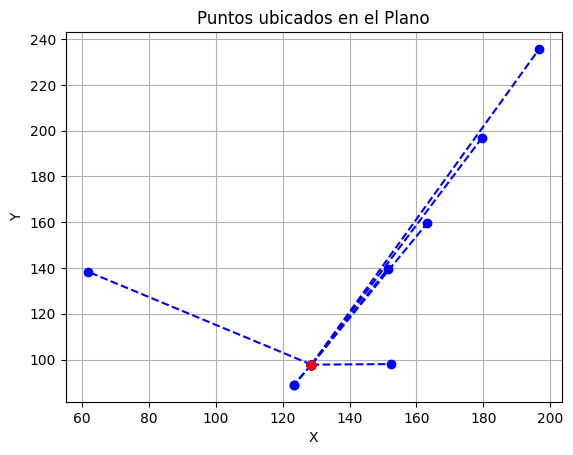

In [29]:
#Se unen las líneas de los puntos
for i in range(df.shape[0]):
  point1 = [x_optimal, y_optimal]
  point2 = [df.iloc[i, 3], df.iloc[i, 4]]
  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]
  plt.plot(x_values, y_values, 'bo', linestyle="dashed")
  plt.plot(x_optimal, y_optimal,'o', color = "red")
plt.grid()
plt.title("Puntos ubicados en el Plano")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Referencias
*   Heizer, J., & Render, B. (2004). Principios de administración de operaciones.
*   Holguín, C. J. V. (2023). Optimización de cadenas de abastecimiento con base en aplicaciones reales: metodología, alcances, limitaciones y beneficios. Universidad del Valle.

